In [1]:
import numpy as np
import matplotlib.pyplot as plt 
N_arr = [2,4,6,8,10,50,100,500,1000,1500,2000,2500,3000,3500] 
pi = np.pi 
Kr = 0.4 
w = 50
dt = 0.01
step_size = 200 
phases_minus_mean = [] 
maxIter = 100 
std = 0 
num_Iter_arr = [] 

In [2]:
def calculate_phases(Kr, w, curr_phase ,step_size, dt): 
    j = 0
    for t in range (0,step_size):    
        phase_mean = np.mean(curr_phase)  
        for i in range (0,len(curr_phase)): 
            curr_phase[i] += w + dt * Kr * np.sin(phase_mean-curr_phase[i]) 
    phases_minus_mean = curr_phase - np.mean(curr_phase) 
    while j < len(curr_phase): 
        if phases_minus_mean[j] > pi or phases_minus_mean[j] < -pi: 
            curr_phase = np.delete(curr_phase,j,None)
            phases_minus_mean = np.delete(phases_minus_mean,j,None)
        j+=1 
    return curr_phase 

In [3]:
def determine_synchronize(Kr,w,curr_phase ,step_size, dt): 
    synchro = False 
    for a in range(maxIter): 
        curr_phase = calculate_phases(Kr, w, curr_phase ,step_size, dt) 
        std = np.std(curr_phase) 
        if std < 10**-4: 
            synchro = True 
            numIter = a 
            break 
    if synchro == True:  
        return synchro, numIter  
    else: 
        print("The fireflies do not synchronize with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
        return synchro, -1  

In [4]:
for i in range(len(N_arr)): 
    curr_phase = np.random.uniform(-pi,pi,N_arr[i]) 
    synchro, numIter = determine_synchronize(Kr,w,curr_phase,step_size,dt) 
    num_Iter_arr.append(numIter) 

In [5]:
print(num_Iter_arr)

[10, 11, 11, 13, 14, 14, 14, 14, 16, 15, 17, 16, 16, 15]


Text(0.5, 1.0, 'Number of Iterations Required vs. N Values')

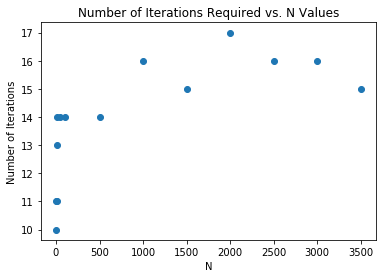

In [6]:
plt.scatter(N_arr, num_Iter_arr) 
plt.xlabel('N')
plt.ylabel('Number of Iterations') 
plt.title('Number of Iterations Required vs. N Values') 